In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# %matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows", 150)

In [3]:
df = pd.read_csv('ESP_parasitarias_1980_2020.csv', sep = ';', encoding = 'latin1', thousands = '.')
df.head()

,Causa de muerte,Edad,Sexo,Periodo,Total
0,00A COVID-19. Virus identificado,Todas las edades,Total,2020,60358
1,00A COVID-19. Virus identificado,Todas las edades,Total,2019,0
2,00A COVID-19. Virus identificado,Todas las edades,Total,2018,0
3,00A COVID-19. Virus identificado,Todas las edades,Total,2017,0
4,00A COVID-19. Virus identificado,Todas las edades,Total,2016,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Causa de muerte  410 non-null    object
 1   Edad             410 non-null    object
 2   Sexo             410 non-null    object
 3   Periodo          410 non-null    int64 
 4   Total            410 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 16.1+ KB


In [5]:
df.drop(['Edad', 'Sexo'], axis=1, inplace=True)

In [6]:
list = []

for i in df['Causa de muerte']:
    i = i[4:]
    list.append(i)

In [7]:
df['Causa'] = list
df.head()

,Causa de muerte,Periodo,Total,Causa
0,00A COVID-19. Virus identificado,2020,60358,COVID-19. Virus identificado
1,00A COVID-19. Virus identificado,2019,0,COVID-19. Virus identificado
2,00A COVID-19. Virus identificado,2018,0,COVID-19. Virus identificado
3,00A COVID-19. Virus identificado,2017,0,COVID-19. Virus identificado
4,00A COVID-19. Virus identificado,2016,0,COVID-19. Virus identificado


In [8]:
df.drop('Causa de muerte', axis = 1, inplace=True)
df.head()

,Periodo,Total,Causa
0,2020,60358,COVID-19. Virus identificado
1,2019,0,COVID-19. Virus identificado
2,2018,0,COVID-19. Virus identificado
3,2017,0,COVID-19. Virus identificado
4,2016,0,COVID-19. Virus identificado


In [9]:
df['Causa'].unique()

array(['COVID-19. Virus identificado',
       'COVID-19. Virus no identificado (sospechoso)',
       ' Enfermedades infecciosas intestinales',
       ' Tuberculosis y sus efectos tardíos', ' Enfermedad meningocócica',
       ' Septicemia', ' Hepatitis vírica', ' SIDA',
       ' VIH+ (portador, evidencias de laboratorio del VIH, ...)',
       ' Resto de enfermedades infecciosas y parasitarias y sus efectos tardíos'],
      dtype=object)

In [10]:
df_covid_id = df[df['Causa'] == 'COVID-19. Virus identificado']
df_covid_no_id = df[df['Causa'] ==  'COVID-19. Virus no identificado (sospechoso)']
df_intest = df[df['Causa'] == ' Enfermedades infecciosas intestinales']
df_tuberc = df[df['Causa'] == ' Tuberculosis y sus efectos tardíos']
df_sept = df[df['Causa'] == ' Septicemia']
df_hep = df[df['Causa'] == ' Hepatitis vírica']
df_sida = df[df['Causa'] == ' SIDA']
df_vih = df[df['Causa'] == ' VIH+ (portador, evidencias de laboratorio del VIH, ...)']
df_mening = df[df['Causa'] == ' Enfermedad meningocócica']
df_resto = df[df['Causa'] == ' Resto de enfermedades infecciosas y parasitarias y sus efectos tardíos']

In [11]:
# df_covid_id = df[(df['Causa'] == 'COVID-19. Virus identificado') & (df['Periodo'] > 2015)]
# df_covid_no_id = df[(df['Causa'] ==  'COVID-19. Virus no identificado (sospechoso)') & (df['Periodo'] > 2015)]
# df_intest = df[(df['Causa'] == ' Enfermedades infecciosas intestinales') & (df['Periodo'] > 2015)]
# df_tuberc = df[(df['Causa'] == ' Tuberculosis y sus efectos tardíos') & (df['Periodo'] > 2015)]
# df_sept = df[(df['Causa'] == ' Septicemia') & (df['Periodo'] > 2015)]
# df_hep = df[(df['Causa'] == ' Hepatitis vírica') & (df['Periodo'] > 2015)]
# df_sida = df[(df['Causa'] == ' SIDA') & (df['Periodo'] > 2015)]
# df_vih = df[(df['Causa'] == ' VIH+ (portador, evidencias de laboratorio del VIH, ...)') & (df['Periodo'] > 2015)]
# df_mening = df[(df['Causa'] == ' Enfermedad meningocócica') & (df['Periodo'] > 2015)]
# df_resto = df[(df['Causa'] == ' Resto de enfermedades infecciosas y parasitarias y sus efectos tardíos') & (df['Periodo'] > 2015)]

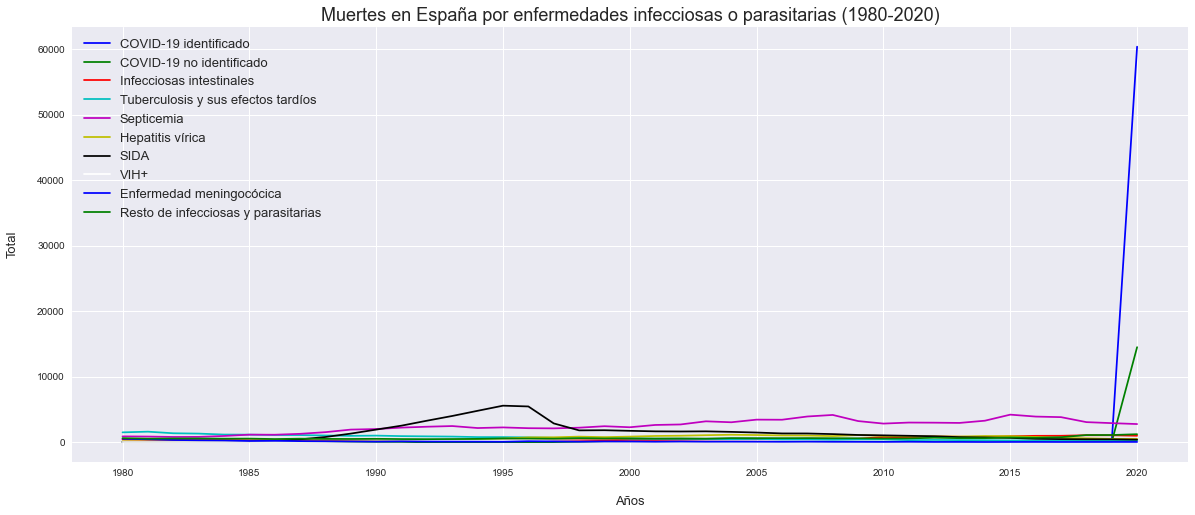

In [12]:
plt.style.use('seaborn')
plt.figure(figsize=(20,8))
plt.plot(df_covid_id['Periodo'], df_covid_id['Total'], linestyle = '-', color = 'b', label='COVID-19 identificado')
plt.plot(df_covid_no_id['Periodo'], df_covid_no_id['Total'], linestyle = '-', color = 'g', label='COVID-19 no identificado')
plt.plot(df_intest['Periodo'], df_intest['Total'], linestyle = '-', color = 'r', label='Infecciosas intestinales')
plt.plot(df_tuberc['Periodo'], df_tuberc['Total'], linestyle = '-', color = 'c', label='Tuberculosis y sus efectos tardíos')
plt.plot(df_sept['Periodo'], df_sept['Total'], linestyle = '-', color = 'm', label='Septicemia')
plt.plot(df_hep['Periodo'], df_hep['Total'], linestyle = '-', color = 'y', label='Hepatitis vírica')
plt.plot(df_sida['Periodo'], df_sida['Total'], linestyle = '-', color = 'k', label='SIDA')
plt.plot(df_vih['Periodo'], df_vih['Total'], linestyle = '-', color = 'w', label='VIH+')
plt.plot(df_mening['Periodo'], df_mening['Total'], linestyle = '-', color = 'b', label='Enfermedad meningocócica')
plt.plot(df_resto['Periodo'], df_resto['Total'], linestyle = '-', color = 'g', label='Resto de infecciosas y parasitarias')
plt.legend(loc='upper left', fontsize=13);
plt.title('Muertes en España por enfermedades infecciosas o parasitarias (1980-2020)', fontsize=18)
plt.xlabel('Años', size=13, labelpad=18)
plt.ylabel('Total', size=13, labelpad=18);

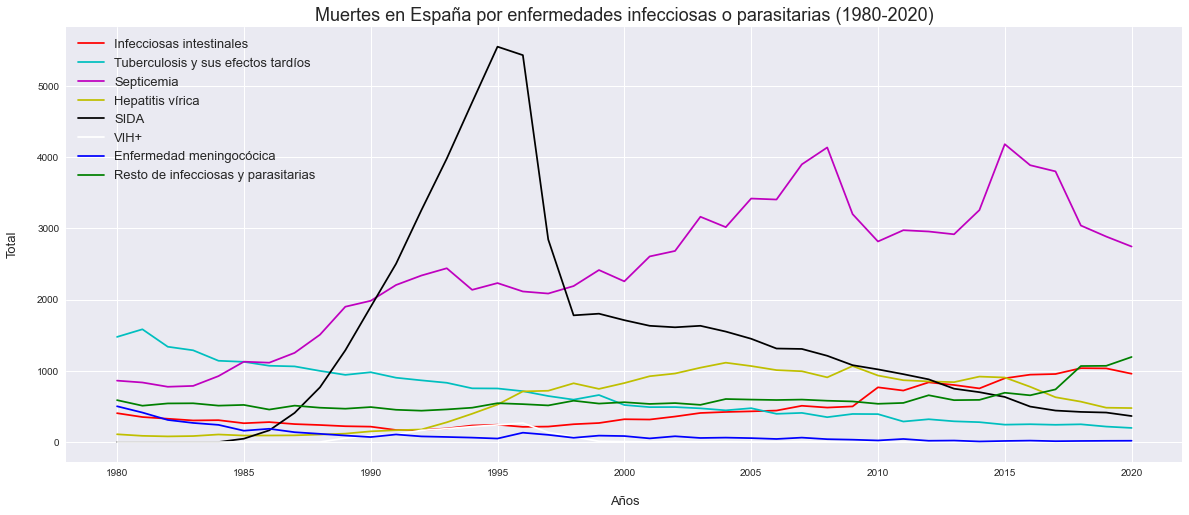

In [13]:
plt.style.use('seaborn')
plt.figure(figsize=(20,8))
plt.plot(df_intest['Periodo'], df_intest['Total'], linestyle = '-', color = 'r', label='Infecciosas intestinales')
plt.plot(df_tuberc['Periodo'], df_tuberc['Total'], linestyle = '-', color = 'c', label='Tuberculosis y sus efectos tardíos')
plt.plot(df_sept['Periodo'], df_sept['Total'], linestyle = '-', color = 'm', label='Septicemia')
plt.plot(df_hep['Periodo'], df_hep['Total'], linestyle = '-', color = 'y', label='Hepatitis vírica')
plt.plot(df_sida['Periodo'], df_sida['Total'], linestyle = '-', color = 'k', label='SIDA')
plt.plot(df_vih['Periodo'], df_vih['Total'], linestyle = '-', color = 'w', label='VIH+')
plt.plot(df_mening['Periodo'], df_mening['Total'], linestyle = '-', color = 'b', label='Enfermedad meningocócica')
plt.plot(df_resto['Periodo'], df_resto['Total'], linestyle = '-', color = 'g', label='Resto de infecciosas y parasitarias')
plt.legend(loc='upper left', fontsize=13);
plt.title('Muertes en España por enfermedades infecciosas o parasitarias (1980-2020)', fontsize=18)
plt.xlabel('Años', size=13, labelpad=18)
plt.ylabel('Total', size=13, labelpad=18);

In [20]:
df_paras_20 = df[df['Periodo'] == 2020]
df_paras_20.sort_values('Total', inplace=True)
df_paras_20.tail()

,Periodo,Total,Causa
82,2020,959,Enfermedades infecciosas intestinales
369,2020,1194,Resto de enfermedades infecciosas y parasitar...
205,2020,2745,Septicemia
41,2020,14481,COVID-19. Virus no identificado (sospechoso)
0,2020,60358,COVID-19. Virus identificado


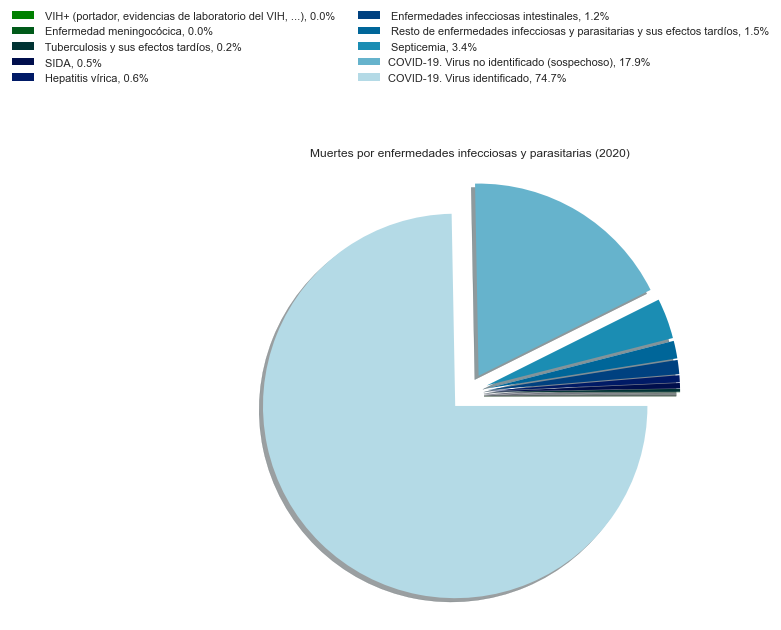

In [15]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
fig1.subplots_adjust(0.3,0,1,0.8)

theme = plt.get_cmap('ocean')
ax1.set_prop_cycle("color", [theme(1. * i / len(df_paras_20['Total'])) for i in range(len(df_paras_20['Total']))])

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

_, _ = ax1.pie(df_paras_20['Total'], startangle=0, explode=explode, shadow=True)

ax1.axis('equal')

total = sum(df_paras_20['Total'])
plt.legend(
    loc='center left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(df_paras_20['Causa'], df_paras_20['Total'])],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure,
    ncol=2    
)
ax1.set_title('Muertes por enfermedades infecciosas y parasitarias (2020)')
plt.show()

In [19]:
df_paras_80 = df[df['Periodo'] == 1980]
df_paras_80.sort_values('Total', inplace=True)
df_paras_80.drop(df_paras_80.index[0:4], inplace=True)
df_paras_80.head()

,Periodo,Total,Causa
286,1980,109,Hepatitis vírica
122,1980,405,Enfermedades infecciosas intestinales
204,1980,502,Enfermedad meningocócica
409,1980,588,Resto de enfermedades infecciosas y parasitar...
245,1980,862,Septicemia


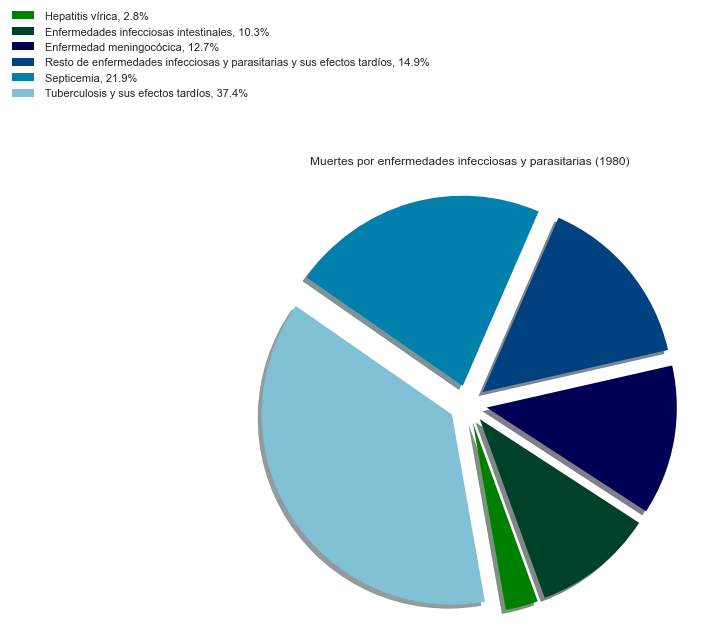

In [17]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
fig1.subplots_adjust(0.3,0,1,0.8)

theme = plt.get_cmap('ocean')
ax1.set_prop_cycle("color", [theme(1. * i / len(df_paras_80['Total'])) for i in range(len(df_paras_80['Total']))])

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

_, _ = ax1.pie(df_paras_80['Total'], startangle=280, explode=explode, shadow=True)

ax1.axis('equal')

total = sum(df_paras_80['Total'])
plt.legend(
    loc='center left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(df_paras_80['Causa'], df_paras_80['Total'])],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure,
    ncol=1
)

ax1.set_title('Muertes por enfermedades infecciosas y parasitarias (1980)')
plt.show()